# Modeling Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import io # Make sure to import io
# This returns a dictionary of uploaded files
uploaded = files.upload()

# Get the filename (assuming you uploaded only one file)
filename = list(uploaded.keys())[0]

# Read the file's content (bytes) into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Now this will work!
print(df.head())

Saving merged_health_census_clean.csv to merged_health_census_clean.csv
  StateAbbr    PlaceName  PlaceFIPS    TractFIPS        Place_TractID  \
0        CA  Los Angeles     644000   6037206032  0644000-06037206032   
1        CA     Pasadena     656000   6037462001  0656000-06037462001   
2        CA    Fullerton     628000   6059011504  0628000-06059011504   
3        TX     Longview    4843888  48183000401  4843888-48183000401   
4        WI      Madison    5548000  55025002200  5548000-55025002200   

   Tract_FIPS_full  Health_Pop  Obesity_Pct  Obesity_Count  Diabetes_Pct  ...  \
0       6037206032        5275         29.5         1556.0          15.5  ...   
1       6037462001        3974         32.0         1272.0          11.6  ...   
2       6059011504        5473         18.7         1023.0           4.6  ...   
3      48183000401        3371         33.9         1143.0           9.2  ...   
4      55025002200        4254         29.5         1255.0           8.7  ...   

  

In [ ]:
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Race_Total,Pct_White_Alone,Pct_Black_Alone,Pct_Asian_Alone,Majority_Race_Clean,Pct_Hispanic,Pct_Other
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,6037206032,5275,29.5,1556.0,15.5,...,309,4.823990,185,5133,58.620690,0.935126,16.637444,Hispanic,77.089421,23.806741
1,CA,Pasadena,656000,6037462001,0656000-06037462001,6037462001,3974,32.0,1272.0,11.6,...,367,5.752670,167,3893,48.548677,10.608785,9.915232,Hispanic,70.459800,30.927305
2,CA,Fullerton,628000,6059011504,0628000-06059011504,6059011504,5473,18.7,1023.0,4.6,...,873,6.832522,379,6024,61.636786,1.626826,23.090969,White,30.378486,13.645418
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,201,4.592980,123,3170,82.965300,9.589905,3.470032,White,7.350158,3.974763
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,594,9.886264,339,4030,73.374690,11.116625,5.831266,White,8.263027,9.677419


In [ ]:
df.shape

(27113, 50)

In [ ]:
df.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Tract_FIPS_full', 'Health_Pop', 'Obesity_Pct', 'Obesity_Count',
       'Diabetes_Pct', 'Diabetes_Count', 'HighChol_Pct', 'HighChol_Count',
       'HighBP_Pct', 'HighBP_Count', 'Stroke_Pct', 'Stroke_Count', 'Sleep_Pct',
       'Sleep_Count', 'MentalHealth_Pct', 'MentalHealth_Count', 'Asthma_Pct',
       'Asthma_Count', 'HeartDisease_Pct', 'HeartDisease_Count', 'Smoking_Pct',
       'Smoking_Count', 'State_FIPS', 'County_FIPS', 'Tract_FIPS',
       'State_Name', 'County_Name', 'Tract_Name', 'Median_Income',
       'Median_Age', 'Poverty_Pct', 'Poverty_Count', 'HS_Grad_Pct',
       'HS_Grad_Count', 'Bachelors_Pct', 'Bachelors_Count', 'Unemployed_Pct',
       'Unemployed_Count', 'Race_Total', 'Pct_White_Alone', 'Pct_Black_Alone',
       'Pct_Asian_Alone', 'Majority_Race_Clean', 'Pct_Hispanic', 'Pct_Other'],
      dtype='object')

### Modeling Setup

In [ ]:
#create obesity categories
df["Obesity_Category"] = pd.qcut(df["Obesity_Pct"], q=3, labels=["Low", "Medium", "High"])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    GroupShuffleSplit,
    StratifiedGroupKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#define features and target
X = df[["Median_Income", "Median_Age", "Poverty_Pct",
        "HS_Grad_Pct", "Bachelors_Pct", "Unemployed_Pct",
        "Pct_White_Alone", "Pct_Black_Alone", "Pct_Asian_Alone",
        "Pct_Hispanic", "Pct_Other"]]
y = df["Obesity_Category"]

df['Tract_FIPS_full'] = df['Tract_FIPS_full'].astype(str).str.zfill(11)


df['County_FIPS'] = df['Tract_FIPS_full'].str[:5]

county_column = "County_FIPS"

------------------------------
Best k (n_neighbors): 25
Best Cross-Validation Accuracy: 0.7266

--- Final Test Set Evaluation ---
Test Set Accuracy: 0.7293

Classification Report:
              precision    recall  f1-score   support

         Low       0.73      0.82      0.77      1862
      Medium       0.81      0.80      0.81      2568
        High       0.63      0.58      0.60      2308

    accuracy                           0.73      6738
   macro avg       0.72      0.73      0.73      6738
weighted avg       0.73      0.73      0.73      6738


Confusion Matrix:
               Predicted Low  Predicted Medium  Predicted High
Actual Low              2056               466              46
Actual Medium            460              1330             518
Actual High                8               326            1528


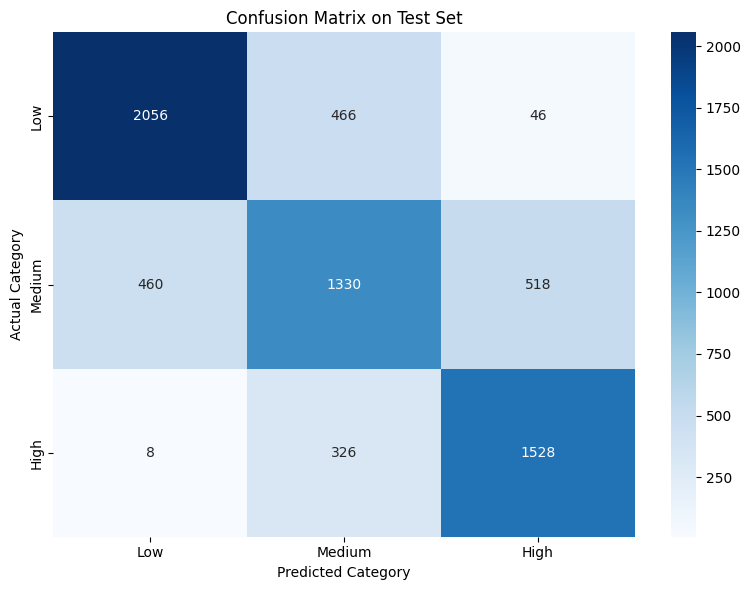

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import (
    GridSearchCV,
    GroupShuffleSplit,
    StratifiedGroupKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_health_census_clean.csv")

df["Obesity_Category"] = pd.qcut(df["Obesity_Pct"], q=3, labels=["Low", "Medium", "High"])

feature_cols = [
    "Median_Income", "Median_Age", "Poverty_Pct",
    "HS_Grad_Pct", "Bachelors_Pct", "Unemployed_Pct",
    "Pct_White_Alone", "Pct_Black_Alone", "Pct_Asian_Alone",
    "Pct_Hispanic", "Pct_Other"
]
X = df[feature_cols]

y = df["Obesity_Category"]

df['Tract_FIPS_full'] = df['Tract_FIPS_full'].astype(str).str.zfill(11)
df['County_FIPS'] = df['Tract_FIPS_full'].str[:5]
g = df["County_FIPS"]

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=80)
train_idx, test_idx = next(gss.split(X, y, groups=g))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
g_train = g.iloc[train_idx]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': list(range(1, 31)) # Test k from 1 to 30
}
knn = KNeighborsClassifier()

cv_strategy = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=80)

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

grid.fit(X_train_scaled, y_train, groups=g_train)

print("-" * 30)
print(f"Best k (n_neighbors): {grid.best_params_['n_neighbors']}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

print("\n--- Final Test Set Evaluation ---")
y_pred = grid.predict(X_test_scaled)

print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
print(pd.DataFrame(cm, index=["Actual Low", "Actual Medium", "Actual High"],
                   columns=["Predicted Low", "Predicted Medium", "Predicted High"]))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title('Confusion Matrix on Test Set')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.show()

Everything below this is old, i just left it in case we still wanna use like the k graph or smth

### kNN

In [ ]:
#cross validation to find k
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#get best hyper params
print("Best hyperparameters:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 4))

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Best CV Accuracy: 0.761


In [ ]:
results = pd.DataFrame(grid.cv_results_)

# Sort by mean test score (descending)
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

# Display top 10 hyperparameter combinations
top_10 = results_sorted.head(10)[['params', 'mean_test_score', 'std_test_score']]
top_10

,params,mean_test_score,std_test_score
119,"{'metric': 'manhattan', 'n_neighbors': 30, 'we...",0.760996,0.000674
113,"{'metric': 'manhattan', 'n_neighbors': 27, 'we...",0.760673,0.001788
115,"{'metric': 'manhattan', 'n_neighbors': 28, 'we...",0.760673,0.002028
107,"{'metric': 'manhattan', 'n_neighbors': 24, 'we...",0.760258,0.001797
111,"{'metric': 'manhattan', 'n_neighbors': 26, 'we...",0.760212,0.001678
109,"{'metric': 'manhattan', 'n_neighbors': 25, 'we...",0.760212,0.002089
105,"{'metric': 'manhattan', 'n_neighbors': 23, 'we...",0.760028,0.002470
117,"{'metric': 'manhattan', 'n_neighbors': 29, 'we...",0.759613,0.001454
99,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.759336,0.002128
97,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.758967,0.002511


these are the top 10 combinations of hyperparameters for mean_test_score (accuracy)
manahttan and weights appear to come up the most so we'll use those. the k we should determine from a graph ig

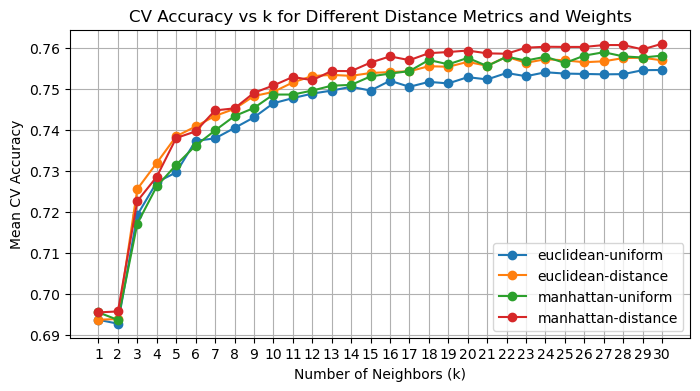

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert cv_results_ to a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Extract k values, weights, metric, and mean test scores
results['k'] = results['param_n_neighbors']
results['weights'] = results['param_weights']
results['metric'] = results['param_metric']
results['mean_score'] = results['mean_test_score']

# Plot accuracy vs k for each weights/metric combination
plt.figure(figsize=(8,4))

for metric in results['metric'].unique():
    for weight in results['weights'].unique():
        subset = results[(results['metric'] == metric) & (results['weights'] == weight)]
        plt.plot(subset['k'], subset['mean_score'], marker='o', label=f'{metric}-{weight}')

plt.title('CV Accuracy vs k for Different Distance Metrics and Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.legend()
plt.xticks(np.arange(results['k'].min(), results['k'].max()+1, 1))  # Whole numbers on x-axis
plt.grid(True)
plt.show()
